<a href="https://colab.research.google.com/github/Ian-Mutuge/ConserveAI/blob/master/Object_detection_YOLOV11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
%pip install torch torchvision torchaudio
!pip install opencv-python-headless
import matplotlib.pyplot as plt

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
import os
import cv2
import shutil
import pandas as pd
from pathlib import Path

In [ ]:
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.6MB/s]


In [ ]:
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542 (from 1)
Receiving objects: 100% (548/548), 34.16 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [ ]:
!pip3 install -r /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
!mkdir OID

In [ ]:
!mkdir OID/Dataset


In [ ]:
classes = 'Weapon'
samples = 10

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv train --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.
   [ERROR] | Missing the class-descriptions-boxable

In [ ]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/train/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format


# Example usage
image_folder = '/content/OID/Dataset/train/Weapon/images'
label_folder = '/content/OID/Dataset/train/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)

print(f"Annotated images are saved in: {output_dir}")


Annotated images are saved in: /content/OID/Dataset/train/Weapon/annotated_images


In [ ]:
classes = 'Weapon'
samples = 10

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv test --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.
   [ERROR] | Missing the test-annotations-bbox.csv 

Annotated images are saved in: /content/OID/Dataset/test/Weapon/annotated_images


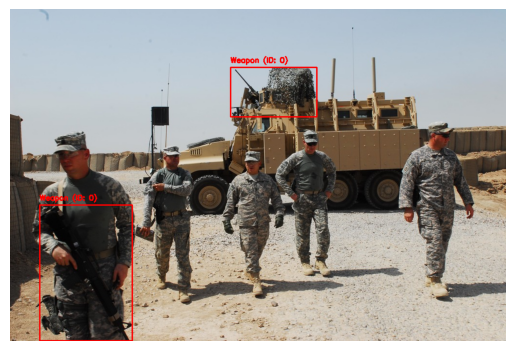

In [ ]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/test/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format

    # Optionally display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes


# Example usage
image_folder = '/content/OID/Dataset/test/Weapon/images'
label_folder = '/content/OID/Dataset/test/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)
print(f"Annotated images are saved in: {output_dir}")


In [ ]:
classes = 'Weapon'
samples = 10

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv validation --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.
   [ERROR] | Missing the validation-annotations-bbo

In [ ]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/validation/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format



# Example usage
image_folder = '/content/OID/Dataset/validation/Weapon/images'
label_folder = '/content/OID/Dataset/validation/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)
print(f"Annotated images are saved in: {output_dir}")


Annotated images are saved in: /content/OID/Dataset/validation/Weapon/annotated_images


In [ ]:


# Path to the directory containing the label files
label_dir = '/content/OID/Dataset/train/Weapon/labels/'

# Loop through all the label files in the directory
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)

        # Read the content of the file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Rewrite the file with numeric class ID
        with open(label_path, 'w') as file:
            for line in lines:
                # Replace "Weapon" with class ID "0"
                line = line.replace('Weapon', '0')
                file.write(line)

In [ ]:
label_dir = '/content/OID/Dataset/train/Weapon/labels'
image_dir = '/content/OID/Dataset/train/Weapon/images'

def normalize_labels(label_path, image_width, image_height):
    normalized_labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x, y, w, h = map(float, parts)
                if 0 <= x <= image_width and 0 <= y <= image_height:
                    # Normalize coordinates to [0, 1]
                    x, y, w, h = x / image_width, y / image_height, w / image_width, h / image_height
                    normalized_labels.append(f"{class_id} {x} {y} {w} {h}")
    return normalized_labels

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    image_path = os.path.join(image_dir, label_file.replace('.txt', '.jpg'))
    if os.path.exists(image_path):
        from PIL import Image
        with Image.open(image_path) as img:
            width, height = img.size
            normalized_labels = normalize_labels(label_path, width, height)
            if normalized_labels:
                with open(label_path, 'w') as file:
                    file.write('\n'.join(normalized_labels))

In [23]:


# Path to the directory containing the label files
label_dir = '/content/OID/Dataset/test/Weapon/labels/'

# Loop through all the label files in the directory
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)

        # Read the content of the file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Rewrite the file with numeric class ID
        with open(label_path, 'w') as file:
            for line in lines:
                # Replace "Weapon" with class ID "0"
                line = line.replace('Weapon', '0')
                file.write(line)

In [24]:
label_dir = '/content/OID/Dataset/test/Weapon/labels'
image_dir = '/content/OID/Dataset/test/Weapon/images'

def normalize_labels(label_path, image_width, image_height):
    normalized_labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x, y, w, h = map(float, parts)
                if 0 <= x <= image_width and 0 <= y <= image_height:
                    # Normalize coordinates to [0, 1]
                    x, y, w, h = x / image_width, y / image_height, w / image_width, h / image_height
                    normalized_labels.append(f"{class_id} {x} {y} {w} {h}")
    return normalized_labels

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    image_path = os.path.join(image_dir, label_file.replace('.txt', '.jpg'))
    if os.path.exists(image_path):
        from PIL import Image
        with Image.open(image_path) as img:
            width, height = img.size
            normalized_labels = normalize_labels(label_path, width, height)
            if normalized_labels:
                with open(label_path, 'w') as file:
                    file.write('\n'.join(normalized_labels))

In [ ]:
# Train the model
results = model.train(data="/content/weapon_dataset.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/weapon_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train2223, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/OID/Dataset/train/Weapon/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/OID/Dataset/test/Weapon/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 2740.66it/s]

val: New cache created: /content/OID/Dataset/test/Weapon/labels.cache
Plotting labels to runs/detect/train2223/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2223
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.261      1.546      1.613         42        640: 100%|██████████| 1/1 [00:10<00:00, 10.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

                   all         10         12      0.139       0.25      0.184     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.172      1.277       1.49         75        640: 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]

                   all         10         12      0.135       0.25      0.176     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.118      1.355      1.499         50        640: 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]

                   all         10         12      0.222       0.25      0.166     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.168      1.318      1.522         64        640: 100%|██████████| 1/1 [00:07<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10         12      0.222       0.25      0.179     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.209      1.403      1.622         56        640: 100%|██████████| 1/1 [00:08<00:00,  8.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         10         12       0.23      0.167      0.142     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.113      1.345      1.583         49        640: 100%|██████████| 1/1 [00:08<00:00,  8.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all         10         12      0.124      0.167      0.105     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.076      1.259      1.451         70        640: 100%|██████████| 1/1 [00:07<00:00,  7.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10         12      0.196      0.167     0.0942     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G       1.11      1.257      1.574         55        640: 100%|██████████| 1/1 [00:07<00:00,  7.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all         10         12     0.0849      0.167     0.0491     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.126       1.28      1.518         62        640: 100%|██████████| 1/1 [00:08<00:00,  8.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         10         12     0.0852      0.167     0.0407     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.075      1.259      1.468         69        640: 100%|██████████| 1/1 [00:09<00:00,  9.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

                   all         10         12      0.046      0.167     0.0352    0.00876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G       1.09      1.287        1.5         52        640: 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         10         12     0.0516      0.167     0.0266    0.00743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.268      1.506       1.64         55        640: 100%|██████████| 1/1 [00:09<00:00,  9.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         10         12     0.0413     0.0833     0.0186    0.00687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]